<a href="https://colab.research.google.com/github/njwaamfdh/Tugas/blob/main/StudyCase3_DatMin_Kelompok_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok E**
1. Faza Muthmainnah - 2006523672
2. Joan Bidadari Annandale - 2006571085
3. Najwa Mufidah - 2006463931
4. Natania Agustin - 2006572895
5. Rifka Amalia - 2006528061
6. Siskawati Simandalahi 2006572970
7. Valery Ongso Putri - 2006570965

Link Github:
https://github.com/fazamina/Case-Study-03-Data-Mining/tree/main

# **Load Packages**

In [ ]:
# Warning install "mlxtend" module first. Jalankan cell ini Hanya jika menggunakan Google Colaboratory:
# Jika menggunakan Jupyter notebook secara lokal (e.g. Anaconda/WinPython) silahkan install lewat terminal (e.g. command prompt)
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend 
    !pip install pycaret
except:
    print("Running the code locally, make sure to install required modules.")#IN_COLAB = False
    
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pycaret.arules import *

%matplotlib inline
plt.style.use('bmh'); sns.set()


Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.8/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.9 MB/s eta 0:00:00
  Installing build depend

## **Load Data**

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fazamina/Case-Study-03-Data-Mining/main/Kasus-AR-MBA-Ganjil-2022.csv', sep=';')

In [ ]:
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,01/07/2022 00:00,Mr. A,1,Roti,Sri Roti,2
1,1,01/07/2022 00:00,Mr. A,2,Air Minum,Aquos,1
2,1,01/07/2022 00:00,Mr. A,11,Mie Instan,Indomi,2
3,1,01/07/2022 00:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,01/07/2022 00:00,Mr. B,2,Air Minum,Aquos,1
5,2,01/07/2022 00:00,Mr. B,6,Snack,Chiki,2
6,2,01/07/2022 00:00,Mr. B,3,Roti,Prambanan,1
7,2,01/07/2022 00:00,Mr. B,5,Shampoo,Clean,1
8,3,02/07/2022 00:00,Mr. C,4,Sabun,Lifboy,1
9,3,02/07/2022 00:00,Mr. C,5,Shampoo,Clean,1


# **Pre-Processing**

Data Cleaning yang kami kerjakan langsung melalui Excel karena data yang diberikan dalam bentuk Excel, setelah data cleaning, kami mengubah menjadi csv dan memasukkannya ke github.


Beberapa hal yang kami lakukan saat data cleaning di Excel yaitu:
1.   Memasukkan data ID Transaksi, Tanggal, Konsumen di baris-baris yang kosong sehingga di setiap baris menjadi satu data transaksi 




# **Analisis**

In [ ]:
df['ID Produk'].unique() #Pengecekan unique value dari setiap kolom untuk mengecek bila apaka ada data yang salah

array([ 1,  2, 11, 12,  6,  3,  5,  4,  9, 10,  8,  7])

In [ ]:
df['Nama Produk'].unique()

array(['Roti', 'Air Minum', 'Mie Instan', 'Snack', 'Shampoo', 'Sabun',
       'Rokok'], dtype=object)

In [ ]:
df['Merek'].unique()

array(['Sri Roti', 'Aquos', 'Indomi', 'Mi Sedap', 'Chiki', 'Prambanan',
       'Clean', 'Lifboy', 'Malioboro', 'Sprit', 'Citata', 'Luks'],
      dtype=object)

In [ ]:
df['Jumlah'].groupby([df['Nama Produk']]).sum() #cek total yang terjual berdasarkan produk

Nama Produk
Air Minum     16
Mie Instan    15
Rokok          5
Roti          15
Sabun         10
Shampoo        7
Snack         16
Name: Jumlah, dtype: int64

Secara *sekilas* kita dapat melihat bahwa produk paling populer dari AlfaIndo adalah **Air Minum, Snack, Mie Instan, dan Roti** serta produk yang paling jarang dibeli adalah **Rokok dan Shampoo**

In [ ]:
df['Jumlah'].groupby([df['Merek']]).sum() #cek total yang terjual berdasarkan merek

Merek
Aquos         6
Chiki        11
Citata        5
Clean         7
Indomi       10
Lifboy        6
Luks          4
Malioboro     5
Mi Sedap      5
Prambanan     4
Sprit        10
Sri Roti     11
Name: Jumlah, dtype: int64

Secara *sekilas* kita dapat melihat bahwa merek paling populer dari AlfaIndo adalah **Chiki, Sri Roti, Indomi, dan Sprit** serta produk yang paling jarang dibeli adalah **Luks, Prambanan, Malioboro, Mi Sedap dan Citata**

# **EDA**

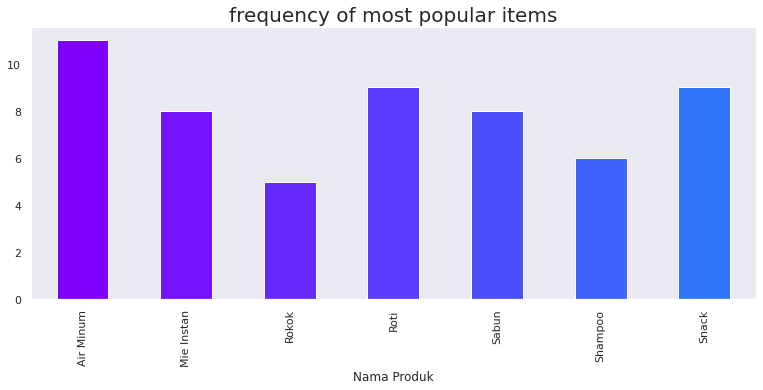

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


color = plt.cm.rainbow(np.linspace(0, 1, 40))
df.groupby(['Nama Produk']).size().plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

*   Produk yang paling banyak dibeli adalah **Air Minum, Snack, dan Roti**. \
*   Produk yang jarang dibeli adalah **Rokok**


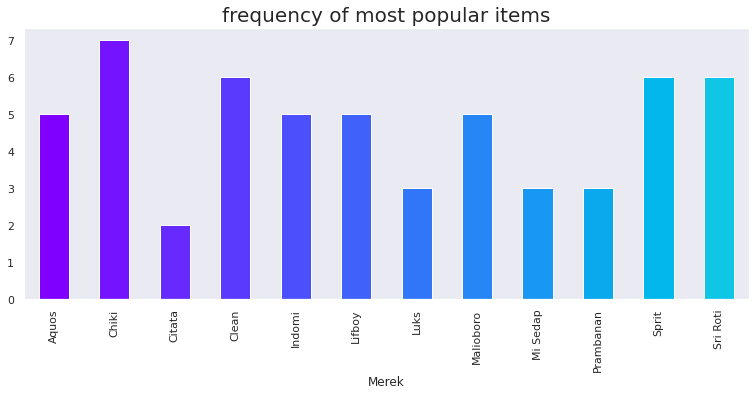

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


color = plt.cm.rainbow(np.linspace(0, 1, 40))
df.groupby(['Merek']).size().plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Untuk produk roti, merek **sri roti** lebih banyak terjual dibandingkan merek **prambanan**


Untuk produk snack, merek **chiki** lebih banyak terjual dibandingkan merek **citata**


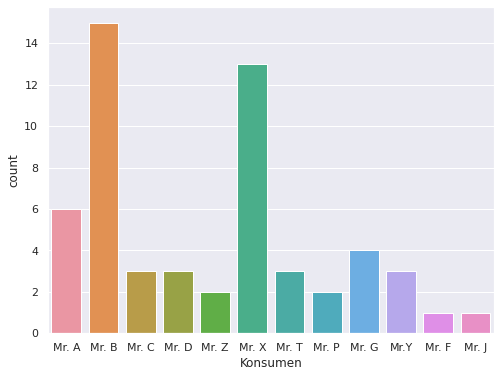

In [ ]:
plt.figure(figsize=(8,6))
p = sns.countplot(x="Konsumen",data=df)
#plt.plot(x, y)

Konsumen yang paling banyak membeli barang adalah Mr.B

# **Group by berdasarkan ID Transaksi dan Nama Produk**



In [ ]:
basket = df.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1.0,3.0,0.0,2.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,2.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2.0,2.0,0.0,2.0,1.0,0.0,3.0
5,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
2,1,0,0,1,0,1,1
3,0,0,1,0,1,1,0
4,1,1,0,1,1,0,1
5,1,0,0,0,0,0,1


**Mengertikan Struktur Data**

In [ ]:
basket_sets.columns

Index(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo',
       'Snack'],
      dtype='object', name='Nama Produk')

In [ ]:
basket_sets.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64', name='ID Transaksi')

In [ ]:
basket_sets.iloc[0]

Nama Produk
Air Minum     1
Mie Instan    1
Rokok         0
Roti          1
Sabun         0
Shampoo       0
Snack         0
Name: 1, dtype: int64

In [ ]:
basket_sets.iloc[0].sum()

3

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
3,0.500000,(Roti)
6,0.500000,(Snack)
4,0.444444,(Sabun)
9,0.444444,"(Roti, Air Minum)"
11,0.388889,"(Snack, Air Minum)"
27,0.333333,"(Roti, Air Minum, Snack)"
5,0.333333,(Shampoo)
1,0.333333,(Mie Instan)
19,0.333333,"(Roti, Snack)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,"(Snack, Air Minum, Mie Instan)","(Roti, Sabun)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
169,"(Air Minum, Sabun)","(Snack, Roti, Mie Instan)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
162,"(Roti, Sabun)","(Snack, Air Minum, Mie Instan)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
152,"(Snack, Roti, Mie Instan)","(Air Minum, Sabun)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
79,"(Snack, Mie Instan)","(Roti, Sabun)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000


In [ ]:
# Filtering
rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,"(Snack, Air Minum, Mie Instan)","(Roti, Sabun)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
152,"(Snack, Roti, Mie Instan)","(Air Minum, Sabun)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf


**Interpertasi Dataset Diatas berdasarkan Association Rule:**

Dapat dilihat bahwa kecendrungan yang paling sering terjadi adalah;
1. Bila seseorang membeli Mie Instan, Roti, dan Snack maka mereka akan cenderung membeli Sabun dan Air Minum
2. Bila seseorang membeli Air Minum, Mie Instan, dan Snack maka mereka akan cenderung membeli Sabun dan Roti

Iteration

In [ ]:
first = pd.DataFrame(basket_sets.sum() / basket_sets.shape[0], columns = ["Jumlah"]).sort_values("Jumlah", ascending = False)
first

,Jumlah
Nama Produk,
Air Minum,0.611111
Roti,0.500000
Snack,0.500000
Sabun,0.444444
Mie Instan,0.333333
Shampoo,0.333333
Rokok,0.277778


In [ ]:
first[first.Jumlah >= 0.15]

,Jumlah
Nama Produk,
Air Minum,0.611111
Roti,0.500000
Snack,0.500000
Sabun,0.444444
Mie Instan,0.333333
Shampoo,0.333333
Rokok,0.277778


In [ ]:
import itertools
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['Air Minum', 'Roti'],
 ['Air Minum', 'Snack'],
 ['Air Minum', 'Sabun'],
 ['Air Minum', 'Mie Instan'],
 ['Air Minum', 'Shampoo'],
 ['Air Minum', 'Rokok'],
 ['Roti', 'Snack'],
 ['Roti', 'Sabun'],
 ['Roti', 'Mie Instan'],
 ['Roti', 'Shampoo']]

In [ ]:
value = []
for i in range(0, len(second)):
    temp = basket_sets.T.loc[second[i]].sum() 
    temp = len(temp[temp == basket_sets.T.loc[second[i]].shape[0]]) / basket_sets.shape[0]
    value.append(temp)
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Jumlah"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Jumlah", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Jumlah > 0.1]
secondIteration

,Jumlah,length
index,,
"(Air Minum, Roti)",0.444444,2
"(Air Minum, Snack)",0.388889,2
"(Roti, Snack)",0.333333,2
"(Sabun, Mie Instan)",0.277778,2
"(Sabun, Shampoo)",0.277778,2
"(Snack, Sabun)",0.277778,2
"(Air Minum, Sabun)",0.166667,2
"(Air Minum, Mie Instan)",0.166667,2
"(Mie Instan, Shampoo)",0.166667,2


In [ ]:
def ar_iterations(data, num_iter = 1, support_value = 0.1, iterationIndex = None):
    
    # Next Iterations
    def ar_calculation(iterationIndex = iterationIndex): 
        # Calculation of support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = basket_sets.T.loc[iterationIndex[i]].sum() 
            result = len(result[result == basket_sets.T.loc[iterationIndex[i]].shape[0]]) / basket_sets.shape[0]
            value.append(result)
        # Bind results
        result = pd.DataFrame(value, columns = ["Jumlah"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Jumlah", ascending = False)
        # Elimination by Support Value
        result = result[result.Jumlah > support_value]
        return result    
    
    # First Iteration
    first = pd.DataFrame(basket_sets.T.sum(axis = 1) / basket_sets.shape[0], columns = ["Jumlah"]).sort_values("Jumlah", ascending = False)
    first = first[first.Jumlah > support_value]
    first["length"] = 1
    
    if num_iter == 1:
        res = first.copy()
        
    # Second Iteration
    elif num_iter == 2:
        
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
        
    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    
    return res


In [ ]:
#first iteration
iteration1 = ar_iterations(basket_sets, num_iter=1, support_value=0.1)
iteration1

,Jumlah,length
Nama Produk,,
Air Minum,0.611111,1
Roti,0.500000,1
Snack,0.500000,1
Sabun,0.444444,1
Mie Instan,0.333333,1
Shampoo,0.333333,1
Rokok,0.277778,1


In [ ]:
#second iteration
iteration2 = ar_iterations(basket_sets, num_iter=2, support_value=0.1)
iteration2

,Jumlah,length
index,,
"(Air Minum, Roti)",0.444444,2
"(Air Minum, Snack)",0.388889,2
"(Roti, Snack)",0.333333,2
"(Sabun, Mie Instan)",0.277778,2
"(Sabun, Shampoo)",0.277778,2
"(Snack, Sabun)",0.277778,2
"(Air Minum, Sabun)",0.166667,2
"(Air Minum, Mie Instan)",0.166667,2
"(Mie Instan, Shampoo)",0.166667,2


In [ ]:
#third iteration
iteration3 = ar_iterations(basket_sets, num_iter=3, support_value=0.01,
              iterationIndex=iteration2.index)
iteration3

,Jumlah,length
index,,
"(Roti, Snack, Air Minum)",0.333333,3
"(Sabun, Snack, Air Minum)",0.166667,3
"(Roti, Mie Instan, Air Minum)",0.166667,3
"(Roti, Sabun, Snack)",0.166667,3
"(Roti, Sabun, Air Minum)",0.166667,3
"(Shampoo, Mie Instan, Sabun)",0.166667,3
"(Mie Instan, Sabun, Snack)",0.166667,3
"(Mie Instan, Sabun, Air Minum)",0.111111,3
"(Mie Instan, Snack, Air Minum)",0.111111,3


In [ ]:
#fourth iteration
iteration4 = ar_iterations(basket_sets, num_iter=4, support_value=0.01,
              iterationIndex=iteration3.index)
iteration4

,Jumlah,length
index,,
"(Roti, Sabun, Snack, Air Minum)",0.166667,4
"(Mie Instan, Sabun, Snack, Air Minum)",0.111111,4
"(Roti, Mie Instan, Snack, Air Minum)",0.111111,4
"(Roti, Mie Instan, Sabun, Air Minum)",0.111111,4
"(Roti, Mie Instan, Sabun, Snack)",0.111111,4
"(Rokok, Roti, Sabun, Air Minum)",0.055556,4
"(Shampoo, Mie Instan, Sabun, Snack)",0.055556,4
"(Shampoo, Roti, Snack, Air Minum)",0.055556,4
"(Rokok, Roti, Mie Instan, Snack)",0.055556,4


In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
3,0.500000,(Roti)
6,0.500000,(Snack)
4,0.444444,(Sabun)
9,0.444444,"(Roti, Air Minum)"
11,0.388889,"(Snack, Air Minum)"
27,0.333333,"(Roti, Air Minum, Snack)"
5,0.333333,(Shampoo)
1,0.333333,(Mie Instan)
19,0.333333,"(Roti, Snack)"


Interpretasi:

Berdasarkan 5 data teratas:
*   61,11% pembelian adalah **Air Minum**
*   50% pembelian adalah **Roti**
*   50% pembelian adalah **Snack**
*   44,44% pembelian adalah **Sabun**
*   44,441% pembelian adalah **Roti dan Air Minum**

Berdasarkan 5 data terbawah:
*   11,11% pembelian adalah **Mie Instan, Roti, dan Snack**
*   11,11% pembelian adalah **Mie Instan, Roti, dan Sabun**
*   11,11% pembelian adalah **Rokok dan Air Minum**
*   11,11% pembelian adalah **Mie Instan, Air Minum, dan Snack**
*   11,11% pembelian adalah **Air Minum, Mie Instan, Roti, Sabun, dan Snack**





In [ ]:
basket_ar = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)
basket_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Roti),(Air Minum),0.500000,0.611111,0.444444,0.888889,1.454545,0.138889,3.500000
1,(Air Minum),(Roti),0.611111,0.500000,0.444444,0.727273,1.454545,0.138889,1.833333
2,(Snack),(Air Minum),0.500000,0.611111,0.388889,0.777778,1.272727,0.083333,1.750000
3,(Air Minum),(Snack),0.611111,0.500000,0.388889,0.636364,1.272727,0.083333,1.375000
4,"(Roti, Air Minum)",(Snack),0.444444,0.500000,0.333333,0.750000,1.500000,0.111111,2.000000
...,...,...,...,...,...,...,...,...,...
102,"(Roti, Mie Instan)","(Snack, Air Minum, Sabun)",0.166667,0.166667,0.111111,0.666667,4.000000,0.083333,2.500000
103,"(Roti, Sabun)","(Snack, Air Minum, Mie Instan)",0.166667,0.111111,0.111111,0.666667,6.000000,0.092593,2.666667
104,"(Snack, Mie Instan)","(Roti, Air Minum, Sabun)",0.166667,0.166667,0.111111,0.666667,4.000000,0.083333,2.500000
105,"(Air Minum, Mie Instan)","(Roti, Snack, Sabun)",0.166667,0.166667,0.111111,0.666667,4.000000,0.083333,2.500000


In [ ]:
basket_ar[(basket_ar.support > 0.15) & (basket_ar.confidence > 0.5)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,"(Air Minum, Mie Instan)",(Roti),0.166667,0.500000,0.166667,1.000000,2.000000,0.083333,inf
18,"(Roti, Mie Instan)",(Air Minum),0.166667,0.611111,0.166667,1.000000,1.636364,0.064815,inf
45,"(Roti, Sabun)",(Air Minum),0.166667,0.611111,0.166667,1.000000,1.636364,0.064815,inf
42,"(Air Minum, Sabun)",(Snack),0.166667,0.500000,0.166667,1.000000,2.000000,0.083333,inf
36,"(Shampoo, Mie Instan)",(Sabun),0.166667,0.444444,0.166667,1.000000,2.250000,0.092593,inf
32,"(Snack, Mie Instan)",(Sabun),0.166667,0.444444,0.166667,1.000000,2.250000,0.092593,inf
30,"(Roti, Sabun)",(Snack),0.166667,0.500000,0.166667,1.000000,2.000000,0.083333,inf
27,"(Air Minum, Sabun)","(Roti, Snack)",0.166667,0.333333,0.166667,1.000000,3.000000,0.111111,inf
26,"(Roti, Sabun)","(Snack, Air Minum)",0.166667,0.388889,0.166667,1.000000,2.571429,0.101852,inf
24,"(Snack, Air Minum, Sabun)",(Roti),0.166667,0.500000,0.166667,1.000000,2.000000,0.083333,inf


Interpretasi
1.	Kolom **Antecedent Support** menyatakan probabilitas konsumen hanya membeli produk antecedents saja. Misal, probabilitas konsumen hanya membeli **Roti** adalah 50%.
2.	Kolom **Consequent Support** menyatakan probabilitas konsumen hanya membeli produk consequents saja. Misal, probabilitas konsumen hanya membeli **Air Minum **adalah 61,11%.
3.	Kolom **Support** menyatakan probabilitas konsumen membeli produk antecedents dan consequents. Misal, probabilitas konsumen membeli **Roti dan Air Minum** adalah 44,44%
4.	Kolom **Confidence** menyatakan seberapa sering aturan (1), (2), dan (3) terbukti benar. 
5.	Kolom **Lift** menyatakan ukuran seberapa sering produk antecedents dan consequents dibeli secara bersamaan dibandingkan jika mereka saling bebas secara statistika. 


# **Group by berdasarkan ID Transaksi dan Merek**



In [ ]:
basket1 = df.groupby(['ID Transaksi', 'Merek'])['Jumlah']
basket1.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
basket1 = basket1.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket1.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket1_sets = basket1.applymap(encode_units) # one-hot encoding
basket1_sets.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,0


**Data Understanding**

In [ ]:
basket1_sets.columns

Index(['Aquos', 'Chiki', 'Citata', 'Clean', 'Indomi', 'Lifboy', 'Luks',
       'Malioboro', 'Mi Sedap', 'Prambanan', 'Sprit', 'Sri Roti'],
      dtype='object', name='Merek')

In [ ]:
basket1_sets.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64', name='ID Transaksi')

In [ ]:
basket1_sets.iloc[0]

Merek
Aquos        1
Chiki        0
Citata       0
Clean        0
Indomi       1
Lifboy       0
Luks         0
Malioboro    0
Mi Sedap     1
Prambanan    0
Sprit        0
Sri Roti     1
Name: 1, dtype: int64

In [ ]:
basket1_sets.iloc[0].sum()

4

In [ ]:
frequent_itemsets = apriori(basket1_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
1,0.388889,(Chiki)
3,0.333333,(Clean)
10,0.333333,(Sprit)
11,0.333333,(Sri Roti)
0,0.277778,(Aquos)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
7,0.277778,(Malioboro)
16,0.166667,"(Clean, Chiki)"
28,0.166667,"(Lifboy, Indomi)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
96,"(Chiki, Sri Roti)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
25,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
24,"(Sprit, Sri Roti)",(Citata),0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
99,"(Aquos, Chiki)","(Lifboy, Sri Roti)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667


In [ ]:
# Filtering
rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
96,"(Chiki, Sri Roti)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
25,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
98,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
94,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf


**Interpertasi Dataset Diatas berdasarkan Association Rule** 

Dapat dilihat bahwa kecendrungan yang paling sering terjadi adalah;
1. Bila seseorang membeli **Lifboy** dan **Aquos** maka mereka akan cenderung membeli serta **Chiki** dan **Sri Roti**
2. Bila seseorang membeli **Chiki** dan **Sri Roti** maka mereka akan cenderung membeli serta **Lifboy** dan **Aquos**
3. Bila seseorang membeli **Citata** maka mereka akan cenderung membeli serta **Sprit** dan **Sri Roti**
4. Bila seseorang membeli **Lifboy** dan **Chiki** maka mereka akan cenderung membeli serta **Aquos** dan **Sri Roti**
5. Bila seseorang membeli **Lifboy** dan **Sri Roti** maka mereka akan cenderung membeli serta **Aquos** dan **Chiki**


Iteration

In [ ]:
first = pd.DataFrame(basket1_sets.sum() / basket1_sets.shape[0], columns = ["Jumlah"]).sort_values("Jumlah", ascending = False)
first

,Jumlah
Merek,
Chiki,0.388889
Clean,0.333333
Sprit,0.333333
Sri Roti,0.333333
Aquos,0.277778
Indomi,0.277778
Lifboy,0.277778
Malioboro,0.277778
Luks,0.166667


In [ ]:
first[first.Jumlah >= 0.15]

,Jumlah
Merek,
Chiki,0.388889
Clean,0.333333
Sprit,0.333333
Sri Roti,0.333333
Aquos,0.277778
Indomi,0.277778
Lifboy,0.277778
Malioboro,0.277778
Luks,0.166667


In [ ]:
import itertools
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['Chiki', 'Clean'],
 ['Chiki', 'Sprit'],
 ['Chiki', 'Sri Roti'],
 ['Chiki', 'Aquos'],
 ['Chiki', 'Indomi'],
 ['Chiki', 'Lifboy'],
 ['Chiki', 'Malioboro'],
 ['Chiki', 'Luks'],
 ['Chiki', 'Mi Sedap'],
 ['Chiki', 'Prambanan']]

In [ ]:
value = []
for i in range(0, len(second)):
    temp = basket1_sets.T.loc[second[i]].sum() 
    temp = len(temp[temp == basket1_sets.T.loc[second[i]].shape[0]]) / basket1_sets.shape[0]
    value.append(temp)
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Jumlah"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Jumlah", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Jumlah > 0.1]
secondIteration

,Jumlah,length
index,,
"(Chiki, Clean)",0.166667,2
"(Clean, Lifboy)",0.166667,2
"(Chiki, Aquos)",0.166667,2
"(Sri Roti, Aquos)",0.166667,2
"(Sprit, Sri Roti)",0.166667,2
"(Indomi, Lifboy)",0.166667,2
"(Clean, Indomi)",0.166667,2
"(Sri Roti, Lifboy)",0.111111,2
"(Sri Roti, Indomi)",0.111111,2


In [ ]:
def ar_iterations(data, num_iter = 1, support_value = 0.1, iterationIndex = None):
    
    # Next Iterations
    def ar_calculation(iterationIndex = iterationIndex): 
        # Calculation of support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = basket1_sets.T.loc[iterationIndex[i]].sum() 
            result = len(result[result == basket1_sets.T.loc[iterationIndex[i]].shape[0]]) / basket1_sets.shape[0]
            value.append(result)
        # Bind results
        result = pd.DataFrame(value, columns = ["Jumlah"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Jumlah", ascending = False)
        # Elimination by Support Value
        result = result[result.Jumlah > support_value]
        return result    
    
    # First Iteration
    first = pd.DataFrame(basket1_sets.T.sum(axis = 1) / basket1_sets.shape[0], columns = ["Jumlah"]).sort_values("Jumlah", ascending = False)
    first = first[first.Jumlah > support_value]
    first["length"] = 1
    
    if num_iter == 1:
        res = first.copy()
        
    # Second Iteration
    elif num_iter == 2:
        
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
        
    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    
    return res


In [ ]:
#first iteration
iteration1 = ar_iterations(basket1_sets, num_iter=1, support_value=0.1)
iteration1

,Jumlah,length
Merek,,
Chiki,0.388889,1
Clean,0.333333,1
Sprit,0.333333,1
Sri Roti,0.333333,1
Aquos,0.277778,1
Indomi,0.277778,1
Lifboy,0.277778,1
Malioboro,0.277778,1
Luks,0.166667,1


In [ ]:
#second iteration
iteration2 = ar_iterations(basket1_sets, num_iter=2, support_value=0.1)
iteration2

,Jumlah,length
index,,
"(Chiki, Clean)",0.166667,2
"(Clean, Lifboy)",0.166667,2
"(Chiki, Aquos)",0.166667,2
"(Sri Roti, Aquos)",0.166667,2
"(Sprit, Sri Roti)",0.166667,2
"(Indomi, Lifboy)",0.166667,2
"(Clean, Indomi)",0.166667,2
"(Sri Roti, Lifboy)",0.111111,2
"(Sri Roti, Indomi)",0.111111,2


In [ ]:
#third iteration
iteration3 = ar_iterations(basket1_sets, num_iter=3, support_value=0.01,
              iterationIndex=iteration2.index)
iteration3

,Jumlah,length
index,,
"(Clean, Chiki, Luks)",0.111111,3
"(Lifboy, Clean, Indomi)",0.111111,3
"(Lifboy, Aquos, Sri Roti)",0.111111,3
"(Indomi, Aquos, Sri Roti)",0.111111,3
"(Lifboy, Chiki, Sri Roti)",0.111111,3
"(Lifboy, Chiki, Aquos)",0.111111,3
"(Chiki, Aquos, Sri Roti)",0.111111,3
"(Sprit, Citata, Sri Roti)",0.111111,3
"(Chiki, Malioboro, Sri Roti)",0.055556,3


In [ ]:
#fourth iteration
iteration4 = ar_iterations(basket1_sets, num_iter=4, support_value=0.01,
              iterationIndex=iteration3.index)
iteration4

,Jumlah,length
index,,
"(Lifboy, Sri Roti, Aquos, Chiki)",0.111111,4
"(Sri Roti, Indomi, Malioboro, Aquos)",0.055556,4
"(Sri Roti, Sprit, Mi Sedap, Luks)",0.055556,4
"(Prambanan, Clean, Aquos, Chiki)",0.055556,4
"(Lifboy, Clean, Indomi, Mi Sedap)",0.055556,4
"(Sprit, Mi Sedap, Citata, Luks)",0.055556,4
"(Clean, Indomi, Chiki, Luks)",0.055556,4
"(Lifboy, Malioboro, Aquos, Chiki)",0.055556,4
"(Lifboy, Sri Roti, Malioboro, Aquos)",0.055556,4


In [ ]:
frequent_itemsets1 = apriori(basket1_sets, min_support=0.07, use_colnames=True)
frequent_itemsets1.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets1

,support,itemsets
1,0.388889,(Chiki)
3,0.333333,(Clean)
10,0.333333,(Sprit)
11,0.333333,(Sri Roti)
0,0.277778,(Aquos)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
7,0.277778,(Malioboro)
16,0.166667,"(Clean, Chiki)"
28,0.166667,"(Lifboy, Indomi)"


Interpretasi:

Berdasarkan 5 data teratas:
*   38,89% pembelian adalah **Chiki**
*   33,33% pembelian adalah **Clean**
*   33,33% pembelian adalah **Sprit**
*   33,33% pembelian adalah **Sri Roti**
*   27,78% pembelian adalah **Aquos**

Berdasarkan 5 data terbawah:
*   11,11% pembelian adalah **Indomi dan Chiki**
*   11,11% pembelian adalah **Lifboy dan Aquos**
*   11,11% pembelian adalah **Aquos dan Indomi**
*   11,11% pembelian adalah **Citata**
*   11,11% pembelian adalah **Sri Roti, Lifboy, Aquos, dan Chiki**






In [ ]:
basket1_ar = association_rules(frequent_itemsets1, metric = "confidence", min_threshold = 0.5)
basket1_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Clean),(Chiki),0.333333,0.388889,0.166667,0.500000,1.285714,0.037037,1.222222
1,(Lifboy),(Indomi),0.277778,0.277778,0.166667,0.600000,2.160000,0.089506,1.805556
2,(Indomi),(Lifboy),0.277778,0.277778,0.166667,0.600000,2.160000,0.089506,1.805556
3,(Lifboy),(Clean),0.277778,0.333333,0.166667,0.600000,1.800000,0.074074,1.666667
4,(Clean),(Lifboy),0.333333,0.277778,0.166667,0.500000,1.800000,0.074074,1.444444
5,(Clean),(Indomi),0.333333,0.277778,0.166667,0.500000,1.800000,0.074074,1.444444
6,(Indomi),(Clean),0.277778,0.333333,0.166667,0.600000,1.800000,0.074074,1.666667
7,(Sprit),(Sri Roti),0.333333,0.333333,0.166667,0.500000,1.500000,0.055556,1.333333
8,(Sri Roti),(Sprit),0.333333,0.333333,0.166667,0.500000,1.500000,0.055556,1.333333
9,(Aquos),(Sri Roti),0.277778,0.333333,0.166667,0.600000,1.800000,0.074074,1.666667


In [ ]:
basket1_ar[(basket_ar.support > 0.15) & (basket1_ar.confidence > 0.5)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,"(Chiki, Luks)",(Clean),0.111111,0.333333,0.111111,1.000000,3.000000,0.074074,inf
30,"(Chiki, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.000000,3.600000,0.080247,inf
41,(Citata),(Sri Roti),0.111111,0.333333,0.111111,1.000000,3.000000,0.074074,inf
27,"(Indomi, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.000000,3.600000,0.080247,inf
26,"(Indomi, Aquos)",(Sri Roti),0.111111,0.333333,0.111111,1.000000,3.000000,0.074074,inf
42,(Citata),(Sprit),0.111111,0.333333,0.111111,1.000000,3.000000,0.074074,inf
24,"(Lifboy, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.000000,3.600000,0.080247,inf
23,"(Lifboy, Aquos)",(Sri Roti),0.111111,0.333333,0.111111,1.000000,3.000000,0.074074,inf
32,"(Lifboy, Aquos)",(Chiki),0.111111,0.388889,0.111111,1.000000,2.571429,0.067901,inf
33,"(Lifboy, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.000000,3.600000,0.080247,inf


Interpretasi
1.	Kolom **Antecedent Support** menyatakan probabilitas konsumen hanya membeli produk antecedents saja. Misal, probabilitas konsumen hanya membeli **Clean** adalah 33,33%.
2.	Kolom **Consequent Support** menyatakan probabilitas konsumen hanya membeli produk consequents saja. Misal, probabilitas konsumen hanya membeli **Chiki** adalah 38,89%.
3.	Kolom **Support** menyatakan probabilitas konsumen membeli produk antecedents dan consequents. Misal, probabilitas konsumen membeli **Clean dan Chiki** adalah 16,67%
4.	Kolom **Confidence** menyatakan seberapa sering aturan (1), (2), dan (3) terbukti benar. 
5.	Kolom **Lift** menyatakan ukuran seberapa sering produk antecedents dan consequents dibeli secara bersamaan dibandingkan jika mereka saling bebas secara statistika. 


# **Rekomendasi untuk Perusahaan**


##Paket Berdasarkan Produk
Berdasarkan 5 data terbawah jumlah pembelian berdasarkan produk diketahui pembelian tersebut kurang dibanding dengan produk lainnya sehingga untuk kategori produk tersebut dapat dibuat promo seperti

**“Paket Nyemil Hemat: Mie Instan, Roti, Snack”**

dengan harga yang lebih murah untuk paket dibanding pembelian satuan produk tersebut.




##Paket Berdasarkan Merek
Dapat dilihat untuk kategori jenis snack, pembelian merek Chiki menjadi pembelian terbanyak sedangkan pembelian Citata menjadi terendah sehingga dapat dibuat promo snack yang menggabungkan untuk membuat penjualan snack yang kurang laku seperti

**“Paket Cikita: Chiki dan Citata”**

dengan harga yang lebih murah untuk paket dibanding pembelian satuan produk tersebut.

##Lokasi Produk yang Strategis

Dapat dilihat dari hasil analisis Association Rule yang telah dilakukan sebelumnya bahwa terdapat beberapa kecendrungan-kecendrungan tertentu yang paling sering terjadi untuk produk adalah;
1. Bila seseorang membeli **Mie Instan**, **Roti**, dan **Snack** maka mereka akan cenderung membeli **Sabun** dan **Air Minum**
2. Bila seseorang membeli **Air Minum**, **Mie Instan**, dan **Snack** maka mereka akan cenderung membeli **Sabun** dan **Roti**

Sehingga, kesimpulan yang dapat diambil bahwa:
1. Maka produk **Mie Instan**, **Roti**, dan **Snack** dapat diletakkan di lokasi yang berjauhan dengan **Sabun** dan **Air Minum** dikarenakan kita mengetahui dari analisa sebelumnya bahwa kedua produk merupakan cukup laku sehingga customer akan cenderung jalan untuk mencari kedua produk maka membuka kesempatan untuk customer melihat produk-produk lain yang disediakan AlfaIndo

Dapat dilihat dari hasil analisis Association Rule yang telah dilakukan sebelumnya bahwa terdapat beberapa kecendrungan-kecendrungan tertentu yang paling sering terjadi untuk merek adalah;
1. Bila seseorang membeli **Lifboy** dan **Aquos** maka mereka akan cenderung membeli serta **Chiki** dan **Sri Roti**
2. Bila seseorang membeli **Chiki** dan **Sri Roti** maka mereka akan cenderung membeli serta **Lifboy** dan **Aquos**
3. Bila seseorang membeli **Citata** maka mereka akan cenderung membeli serta **Sprit** dan **Sri Roti**
4. Bila seseorang membeli **Lifboy** dan **Chiki** maka mereka akan cenderung membeli serta **Aquos** dan **Sri Roti**
5. Bila seseorang membeli **Lifboy** dan **Sri Roti** maka mereka akan cenderung membeli serta **Aquos** dan **Chiki**

Sehingga, kesimpulan yang dapat diambil bahwa:
1. **Lifboy dan Aquos** dapat ditaro **berjauhan** dengan **Chiki dan Sri Roti** dikarenakan kedua produk cukup populer dari analisis sebelumnya sehingga customer akan cenderung jalan untuk mencari kedua produk maka membuka kesempatan untuk customer melihat produk-produk lain yang disediakan AlfaIndo
2. Dikarenakan **Citata** merupakan produk yang kurang populer dibandingkan **Sprit** dan **Sri Roti** maka dapat diletakkan berdekatan dengan produk tersebut untuk mempromosikan **Citata** serta mengingatkan pelanggan untuk tidak lupa membelinya 


##Stock Produk
Untuk **produk roti**, perbanyak stock **Sri Roti** dari pada Prambanan karena konsumen cenderung membeli merek Sri Roti

Untuk **produk snack**, perbanyak stock **Chiki** dari pada Citata karena konsumen cenderung membeli merek Chiki

##Konsumen Premium
Berdasarkan hasil plot jumlah pembelian konsumen, dapat diberikan keistimewaan seperti **Premium Member Card** untuk yang sudah memenuhi jumlah pembelian diatas 10 dengan keuntungan mendapatkan promo atau paket hemat lainnya, dalam hal ini konsumen **Mr. B** dan **Mr. X** sudah bisa mendapatkan Premium Member Card.
